In [1]:
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt
from deepposekit.io import VideoReader, DataGenerator, initialize_dataset
from deepposekit.annotate import KMeansSampler
import tqdm
import glob
import pandas as pd

from os.path import expanduser

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

HOME = expanduser("~") if not IN_COLAB else '.'

In [5]:
image_path = "C:\\Users\\exley\\Desktop\\CDME\\RobotPose\\data\\2d"
ds_path = "C:\\Users\\exley\\Desktop\\CDME\\RobotPose\\data\\mult_ds.h5"
skeleton_path = "C:\\Users\\exley\\Desktop\\CDME\\RobotPose\\data\\mult_skeleton.csv"

ds = np.zeros((len(os.listdir(image_path)), 480, 640, 3),dtype=np.uint8)


for file, idx in zip(os.listdir(image_path), range(len(os.listdir(image_path)))):
    img = cv2.imread(os.path.join(image_path,file))
    cv2.imshow("image",img)
    cv2.waitKey(1)
    ds[idx,:,:,:] = img
cv2.destroyAllWindows()

initialize_dataset(
    images=ds,
    datapath=ds_path,
    skeleton=skeleton_path,
    overwrite=True # This overwrites the existing datapath
)

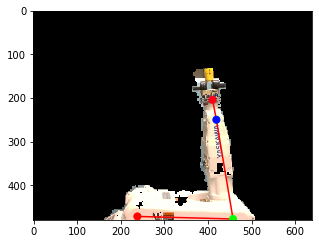

In [9]:
data_generator = DataGenerator(ds_path, mode="full")

image, keypoints = data_generator[0]

plt.figure(figsize=(5,5))
image = image[0] if image.shape[-1] is 3 else image[0, ..., 0]
cmap = None if image.shape[-1] is 3 else 'gray'
plt.imshow(image, cmap=cmap, interpolation='none')
for idx, jdx in enumerate(data_generator.graph):
    if jdx > -1:
        plt.plot(
            [keypoints[0, idx, 0], keypoints[0, jdx, 0]],
            [keypoints[0, idx, 1], keypoints[0, jdx, 1]],
            'r-'
        )
plt.scatter(keypoints[0, :, 0], keypoints[0, :, 1], c=np.arange(data_generator.keypoints_shape[0]), s=50, cmap=plt.cm.hsv, zorder=3)

plt.show()

In [10]:
from deepposekit import Annotator
app = Annotator(datapath=ds_path,
                dataset='images',
                skeleton=skeleton_path,
                shuffle_colors=False,
                text_scale=1)

app.run()

Saved
